# Analyse factoriel

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

## 1. À partir de la feuille Feuil1.xls, téléchargez le contenu de la base de données et affichez son contenue.

In [2]:
df=pd.read_excel('Autos_Mixtes.xlsx',sheet_name='Feuil1',index_col=0)


## 2. Identifiez les données quantitatives et les données qualitatives.

In [3]:
df.info()

N = df.shape[0]
K = df.shape[1]
print("Nombre d'individus",N)
print("Nombre de variables ",K)

<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, GOLF         to SANTA_FE    
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   puissance  10 non-null     int64 
 1   longueur   10 non-null     int64 
 2   hauteur    10 non-null     int64 
 3   poids      10 non-null     int64 
 4   CO2        10 non-null     int64 
 5   origine    10 non-null     object
 6   carburant  10 non-null     object
 7   4X4        10 non-null     object
dtypes: int64(5), object(3)
memory usage: 720.0+ bytes
Nombre d'individus 10
Nombre de variables  8


In [4]:
df.head(5)

,puissance,longueur,hauteur,poids,CO2,origine,carburant,4X4
Modele,,,,,,,,
GOLF,75,421,149,1217,143,Europe,Diesel,non
CITRONC4,138,426,146,1381,142,France,Diesel,non
P607,204,491,145,1723,223,France,Diesel,non
VELSATIS,150,486,158,1735,188,France,Diesel,non
CITRONC2,61,367,147,932,141,France,Essence,non


#### Variables qualitative: Modele, origine,carburant et 4x4
#### Variables quantitative: puissance, longuer, hauteur, poids et CO2

#### Variable expiquee : Modele

## 3. Effectuez la préparation des données quantitatives en vue d’une analyse factorielle.

#### On va standardiser (centrage et reduction) les donnees quantitative (sauvegardes dans matrice M) et sauvegarder dans matrice X

In [5]:
M1=df[['puissance', 'longueur', 'hauteur', 'poids', 'CO2']]
p1=M1.shape[1]
print(p1)

5


In [6]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
X1std= scaler.fit_transform(M1)

In [7]:
#Or:
#X1std=(M1.values-np.mean(M1.values,axis=0))/np.std(M1.values,axis=0)
#print(X1std.round(3))
#dfnew=pd.DataFrame(X1std)
#dfnew.to_excel('output.xlsx')

In [8]:
print(X1std.round(3))
None
X1=pd.DataFrame(X1std.reshape((10,5)))
print(X1)

[[-1.103 -0.614 -0.419 -0.989 -1.127]
 [-0.304 -0.485 -0.733 -0.411 -1.148]
 [ 0.532  1.192 -0.838  0.795  0.558]
 [-0.152  1.063  0.524  0.837 -0.179]
 [-1.28  -2.007 -0.628 -1.993 -1.169]
 [ 2.256  1.476 -0.524  1.189  1.99 ]
 [-0.761 -0.614 -1.047 -1.031 -0.6  ]
 [ 0.507  0.263  1.466  0.344  0.853]
 [ 0.773 -0.408  0.105  0.344  0.811]
 [-0.469  0.134  2.094  0.915  0.011]]
          0         1         2         3         4
0 -1.102875 -0.614031 -0.418854 -0.988562 -1.126565
1 -0.304241 -0.485033 -0.732994 -0.410579 -1.147623
2  0.532422  1.191942 -0.837708  0.794727  0.558018
3 -0.152121  1.062944  0.523567  0.837018 -0.178987
4 -1.280349 -2.007209 -0.628281 -1.992984 -1.168680
5  2.256457  1.475737 -0.523567  1.189447  1.989915
6 -0.760604 -0.614031 -1.047135 -1.030854 -0.600133
7  0.507069  0.263156  1.465989  0.343618  0.852821
8  0.773280 -0.407634  0.104713  0.343618  0.810706
9 -0.469039  0.134158  2.094270  0.914552  0.010529


### Vérification que les données sont centrées et réduites

In [9]:
import math
Moy =np.mean(X1std.round(3),axis=0)
print('Les moyennes des variables de X \n', Moy.round(3))
print('Les écarts types des variables de X\n', np.std(X1std,axis=0,ddof=0))

Les moyennes des variables de X 
 [-0. -0.  0.  0. -0.]
Les écarts types des variables de X
 [1. 1. 1. 1. 1.]


## 4. Représentez les données qualitatives sous la forme d’un tableau disjonctif (TDC) en vue d’une analyse factorielle.

### On va sauvegarder les donnees quantitative en matrice M2


In [10]:
M2=df[['origine', 'carburant', '4X4']]
p2=M2.shape[1]
print(M2)

             origine carburant  4X4
Modele                             
GOLF          Europe    Diesel  non
CITRONC4      France    Diesel  non
P607          France    Diesel  non
VELSATIS      France    Diesel  non
CITRONC2      France   Essence  non
CHRYS300      Autres   Essence  non
AUDIA3        Europe   Essence  non
OUTLAND       Autres    Diesel  oui
PTCRUISER     Autres   Essence  non
SANTA_FE      Autres    Diesel  oui


In [11]:
#! pip install fanalysis


### Tableau disjonctif complet (TDC)

In [12]:
X2 = pd.get_dummies(M2,prefix='',prefix_sep='')
print(X2)

              Autres  Europe  France  Diesel  Essence  non  oui
Modele                                                         
GOLF               0       1       0       1        0    1    0
CITRONC4           0       0       1       1        0    1    0
P607               0       0       1       1        0    1    0
VELSATIS           0       0       1       1        0    1    0
CITRONC2           0       0       1       0        1    1    0
CHRYS300           1       0       0       0        1    1    0
AUDIA3             0       1       0       0        1    1    0
OUTLAND            1       0       0       1        0    0    1
PTCRUISER          1       0       0       0        1    1    0
SANTA_FE           1       0       0       1        0    0    1


In [13]:
#nombre total de modalites
Modal=X2.shape[1]
print('Nombre  total des modalites',Modal)
#proportions
pk=np.mean(X2.values,axis=0)
print('proportions: ',pk)

Nombre  total des modalites 7
proportions:  [0.4 0.2 0.4 0.6 0.4 0.8 0.2]


### Standardisation des donnees qualitatives (des indicatrices)

In [14]:
X2std=X2.values/np.sqrt(pk)
print(X2std.round(3))

[[0.    2.236 0.    1.291 0.    1.118 0.   ]
 [0.    0.    1.581 1.291 0.    1.118 0.   ]
 [0.    0.    1.581 1.291 0.    1.118 0.   ]
 [0.    0.    1.581 1.291 0.    1.118 0.   ]
 [0.    0.    1.581 0.    1.581 1.118 0.   ]
 [1.581 0.    0.    0.    1.581 1.118 0.   ]
 [0.    2.236 0.    0.    1.581 1.118 0.   ]
 [1.581 0.    0.    1.291 0.    0.    2.236]
 [1.581 0.    0.    0.    1.581 1.118 0.   ]
 [1.581 0.    0.    1.291 0.    0.    2.236]]


## 5. Représentez une matrice sommaire des données

In [15]:
### Assamblage de deux matrices X1std et X2std

In [16]:
X=np.concatenate((X1std,X2std),axis=1)
print(X.round(3))

[[-1.103 -0.614 -0.419 -0.989 -1.127  0.     2.236  0.     1.291  0.
   1.118  0.   ]
 [-0.304 -0.485 -0.733 -0.411 -1.148  0.     0.     1.581  1.291  0.
   1.118  0.   ]
 [ 0.532  1.192 -0.838  0.795  0.558  0.     0.     1.581  1.291  0.
   1.118  0.   ]
 [-0.152  1.063  0.524  0.837 -0.179  0.     0.     1.581  1.291  0.
   1.118  0.   ]
 [-1.28  -2.007 -0.628 -1.993 -1.169  0.     0.     1.581  0.     1.581
   1.118  0.   ]
 [ 2.256  1.476 -0.524  1.189  1.99   1.581  0.     0.     0.     1.581
   1.118  0.   ]
 [-0.761 -0.614 -1.047 -1.031 -0.6    0.     2.236  0.     0.     1.581
   1.118  0.   ]
 [ 0.507  0.263  1.466  0.344  0.853  1.581  0.     0.     1.291  0.
   0.     2.236]
 [ 0.773 -0.408  0.105  0.344  0.811  1.581  0.     0.     0.     1.581
   1.118  0.   ]
 [-0.469  0.134  2.094  0.915  0.011  1.581  0.     0.     1.291  0.
   0.     2.236]]


In [17]:
listcol=[list(M1.columns)+list(X2.columns)]
print(listcol)

[['puissance', 'longueur', 'hauteur', 'poids', 'CO2', 'Autres', 'Europe', 'France', 'Diesel', 'Essence', 'non', 'oui']]


In [18]:
p=X.shape[1]
print('Dimention de la matrice de donnees preparees',p,p1+Modal)

Dimention de la matrice de donnees preparees 12 12


## 6.  Analyse AFDM. Faites une analyse du nombre de facteurs principaux à retenir. Justifiez votre raisonnement et les différentes étapes à réaliser.

In [19]:
from fanalysis.pca import PCA

### Modele

In [20]:
afdm=PCA(std_unit=False,row_labels=df.index,col_labels=listcol)

### Fit

In [21]:
afdm.fit(X)
None

C:\Users\valm044\Anaconda3\lib\site-packages\scipy\stats\stats.py:3538: PearsonRNearConstantInputWarning: An input array is nearly constant; the computed correlation coefficent may be inaccurate.
  warnings.warn(PearsonRNearConstantInputWarning())


### Nombre des axes maximal a retenir

In [22]:
Fmax=p-p2
print('Nombre maximal de facteurs principaux',Fmax )

Nombre maximal de facteurs principaux 9


## 7. Déterminez les valeurs propres de l’ensemble des données

In [23]:
print(afdm.eig_[0].round(3))

[4.273e+00 2.122e+00 1.439e+00 8.360e-01 1.640e-01 1.140e-01 3.400e-02
 1.600e-02 2.000e-03 0.000e+00]


In [24]:
s=np.arange(1,Fmax+2)
display(s)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [25]:
XX=pd.DataFrame(np.transpose(afdm.eig_),columns=['Val.P','%','Cumul %'])
XX.set_index(s,inplace=True)
display(XX)

,Val.P,%,Cumul %
1,4.273136e+00,4.747928e+01,47.479285
2,2.121887e+00,2.357653e+01,71.055811
3,1.438718e+00,1.598575e+01,87.041565
4,8.363671e-01,9.292968e+00,96.334533
5,1.640301e-01,1.822556e+00,98.157089
6,1.144703e-01,1.271892e+00,99.428982
7,3.362515e-02,3.736128e-01,99.802594
8,1.580522e-02,1.756136e-01,99.978208
9,1.961281e-03,2.179201e-02,100.000000
10,1.087369e-32,1.208187e-31,100.000000


### Determination de nombre de facteurs principaux a partir de le Elbow plot

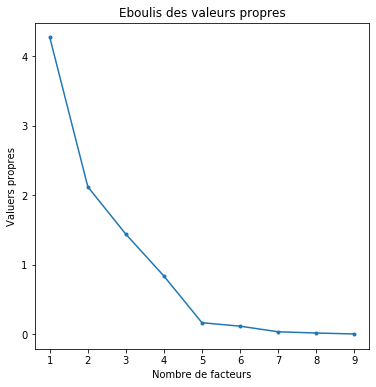

In [26]:
fix,ax=plt.subplots(figsize=(6,6))
ax.plot(range(1,Fmax+1),afdm.eig_[0][:Fmax],".-")
ax.set_xlabel("Nombre de facteurs")
ax.set_ylabel("Valuers propres")
plt.title("Eboulis des valeurs propres")
plt.show()

- A  partir de le table XX et la figure en haut on peut determiner que la rpis grande contribution est de facteurs 1 et 2. 
Le premier cassure et a N=2. Donc on a choisi le 2 axes facteuriels pour faire la representation. Contribution cumulative deest 71% (varience expliquee).

## 8. Déterminez la contribution des variables aux 2 premiers axes factoriels. Commentez les résultats.

### Representation des individus dans le plan factoriel

In [27]:
XXX=pd.DataFrame(afdm.row_coord_[:,:2],index=df.index,columns=['Coord.F1','Coord.F2'])
display(XXX)

,Coord.F1,Coord.F2
Modele,,
GOLF,2.317805,-0.687271
CITRONC4,1.445368,-0.122286
P607,-0.779731,1.018563
VELSATIS,-0.541063,-0.160059
CITRONC2,3.275864,0.025117
CHRYS300,-2.957705,2.628112
AUDIA3,2.316133,0.795341
OUTLAND,-2.255919,-1.840426
PTCRUISER,-0.931809,1.090852


-

## 9. Représentez graphiquement les variables et les individus sur le même graphique.

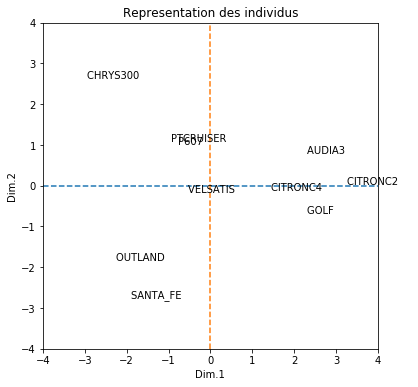

In [28]:
fix,ax=plt.subplots(figsize=(6,6))
ax.axis([-4,+4,-4,+4])
ax.plot([-4,+4],[0,0],linestyle='--')
ax.plot([0,0],[-4,+4],linestyle='--')
ax.set_xlabel("Dim.1")
ax.set_ylabel("Dim.2")
plt.title('Representation des individus')
for i in range(df.shape[0]):
    ax.text(afdm.row_coord_[i,0],afdm.row_coord_[i,1],df.index[i])
plt.show()    

### Coordonnees des variables-modalites

In [29]:
print(pd.DataFrame(afdm.col_coord_[:,:2],columns=['F1','F2'],index=listcol))

                 F1        F2
puissance -0.819345  0.539186
longueur  -0.796182  0.244889
hauteur   -0.578377 -0.763585
poids     -0.929516  0.061131
CO2       -0.890662  0.378984
Autres    -0.614538 -0.094369
Europe     0.501259  0.016589
France     0.260095  0.082639
Diesel    -0.106325 -0.402313
Essence    0.130221  0.492730
non        0.224177  0.352170
oui       -0.448355 -0.704340


### Carre des correlations des variables quantitatives: r2

In [30]:
corr2F1=(np.corrcoef(afdm.row_coord_[:,0],X1.values,rowvar=False)**2)[0,1:]
print(corr2F1)

[0.67132603 0.6339052  0.33451975 0.86400031 0.79327801]


In [31]:
corr2F2=(np.corrcoef(afdm.row_coord_[:,1],X1.values,rowvar=False)**2)[0,1:]
print(corr2F2)

[0.29072151 0.05997081 0.583062   0.00373703 0.14362903]


### Carre des correlations des variables qualitatives: eta2

In [32]:
print(afdm.row_coord_[:,0])

[ 2.31780488  1.44536838 -0.77973114 -0.54106289  3.27586403 -2.95770457
  2.31613266 -2.25591897 -0.93180905 -1.88894333]


In [36]:
# dataframe temporaire pour l'axe 1:
temp=df.copy()
temp['F1']=afdm.row_coord_[:,0]
#print(df.info())

print("-----ETA2  Pour l'axe 1------")
########################Variant1##########################
print('-----V1------')
#effectif par groupe de origine
n_g = pd.pivot_table(temp,values='F1',index='origine',aggfunc='count')
#moyennes conditionnelles pour le 1er facteur
m_1 = pd.pivot_table(temp,values='F1',index='origine',aggfunc='mean')
#carre du rapport de correlation pour origine:
eta_origineF1=np.sum((n_g.F1/n)*(m_1.F1**2))/afdm.eig_[0][0]
print(eta_origineF1)


#effectif par groupe de carburant
n_g = pd.pivot_table(temp,values='F1',index='carburant',aggfunc='count')
#moyennes conditionnelles pour le 1er facteur
m_1 = pd.pivot_table(temp,values='F1',index='carburant',aggfunc='mean')
#carre du rapport de correlation pour carburant:
eta_carburantF1=np.sum((n_g.F1/n)*(m_1.F1**2))/afdm.eig_[0][0]
print(eta_carburantF1)

#effectif par groupe de 4X4
n_g = pd.pivot_table(temp,values='F1',index='4X4',aggfunc='count')
#moyennes conditionnelles pour le 1er facteur
m_1 = pd.pivot_table(temp,values='F1',index='4X4',aggfunc='mean')
#carre du rapport de correlation pour 4X4:
eta_4X4F1=np.sum((n_g.F1/n)*(m_1.F1**2))/afdm.eig_[0][0]
print(eta_4X4F1)

########################Variant2##########################
print('-----V2------')
#carre du rapport de correlation pour origine:
eta_origineF1=np.sum((pd.pivot_table(temp,values='F1',index='origine').values[:,0]**2)*pk[0:3])/afdm.eig_[0][0]
print(eta_origineF1)


#carre du rapport de correlation pour carburant:
eta_carburantF1=np.sum((pd.pivot_table(temp,values='F1',index='carburant').values[:,0]**2)*pk[3:5])/afdm.eig_[0][0]
print(eta_carburantF1)

#carre du rapport de correlation pour 4x4:
eta_4X4F1=np.sum((pd.pivot_table(temp,values='F1',index='4X4').values[:,0]**2)*pk[5:])/afdm.eig_[0][0]
print(eta_4X4F1)

-----ETA2  Pour l'axe 1------
-----V1------


NameError: name 'n' is not defined

In [38]:
# dataframe temporaire pour l'axe 2:
temp=df.copy()
temp['F2']=afdm.row_coord_[:,1]

print("-----ETA2 Pour l'axe 2------")
#carre du rapport de correlation pour origine:
eta_origineF2=np.sum((pd.pivot_table(temp,values='F2',index='origine').values[:,0]**2)*pk[0:3])/afdm.eig_[0][1]
print(eta_origineF2)


#carre du rapport de correlation pour carburant:
eta_carburantF2=np.sum((pd.pivot_table(temp,values='F2',index='carburant').values[:,0]**2)*pk[3:5])/afdm.eig_[0][1]
print(eta_carburantF2)

#carre du rapport de correlation pour 4x4:
eta_4X4F2=np.sum((pd.pivot_table(temp,values='F2',index='4X4').values[:,0]**2)*pk[5:])/afdm.eig_[0][1]
print(eta_4X4F2)

-----ETA2 Pour l'axe 2------
0.0160099676029385
0.4046388988769231
0.6201180649628443


In [37]:
#Moyennes conditionnelles
DD=df.copy()
DD['F1']=afdm.row_coord_[:,0]
DD['F2']=afdm.row_coord_[:,1]
pd.pivot_table(DD,values=['F1','F2'],index='origine')

,F1,F2
origine,,
Autres,-2.008594,-0.217351
Europe,2.316969,0.054035
France,0.850110,0.190334
